In [2]:
from sklearn import datasets
import numpy as np
from xgboost.testing import datasets

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = datasets.make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std)

In [5]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

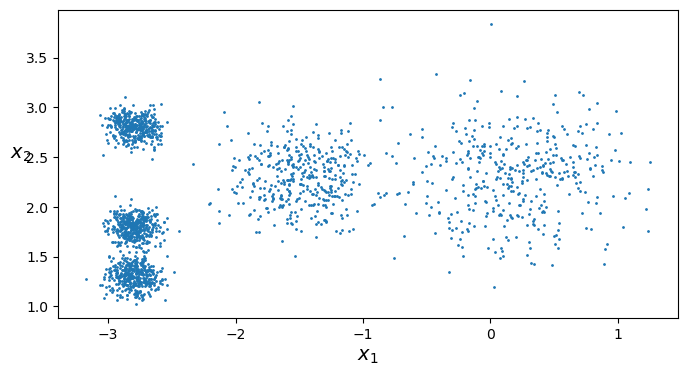

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

In [13]:
from sklearn.cluster import KMeans

In [14]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [15]:
y_pred

array([3, 3, 3, ..., 2, 2, 0], shape=(2000,), dtype=int32)

In [16]:
y_pred is kmeans.labels_

True

In [17]:
kmeans.cluster_centers_

array([[-2.80187291,  1.30148462],
       [ 0.21662209,  2.30450301],
       [-2.7904586 ,  2.80481788],
       [-1.45234594,  2.29503328],
       [-2.79306654,  1.80010828]])

In [18]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [19]:
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

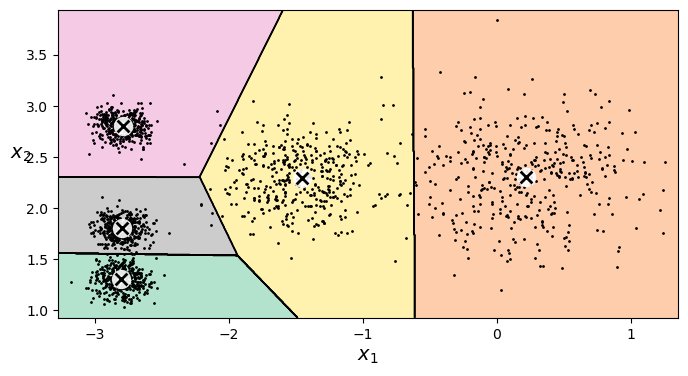

In [21]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [22]:
kmeans.transform(X_new)

array([[2.88763147, 0.37369401, 2.90420231, 1.48200991, 2.80021024],
       [5.84377044, 2.79998477, 5.84612202, 4.46211037, 5.79651418],
       [1.71003183, 3.29095331, 0.28636281, 1.70065022, 1.21760486],
       [1.21478124, 3.22255748, 0.36989395, 1.56116766, 0.72984236]])

In [23]:
kmeans.inertia_

214.27662384717655

In [24]:
kmeans.score(X)

-214.27662384717655

In [25]:
from sklearn.cluster import MiniBatchKMeans

In [26]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,None
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [27]:
minibatch_kmeans.inertia_

214.41390969708175

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_score(X, kmeans.labels_)

0.6508693482910143

In [36]:
import requests
from PIL import Image
import numpy as np
from io import BytesIO

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"

# Fetch bytes
response = requests.get(url)

# Open image from bytes and convert to numpy array
image = np.array(Image.open(BytesIO(response.content)))

In [37]:
image.shape

(533, 800, 3)

In [41]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [42]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.astype(np.uint8)
    segmented_imgs.append(segmented_img.reshape(image.shape))

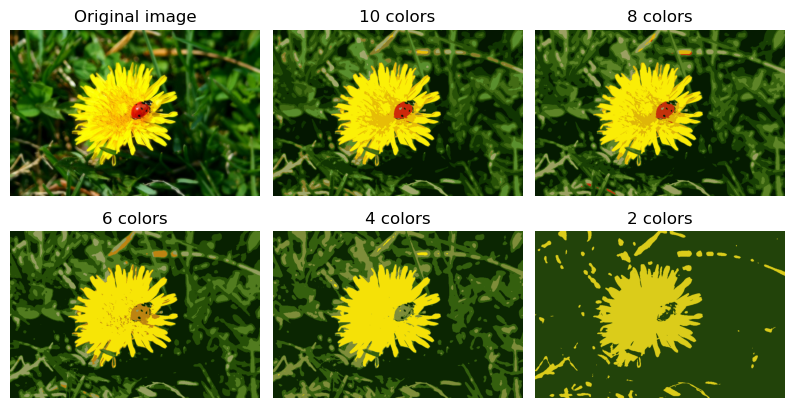

In [43]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

In [44]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_digits,y_digits)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train, y_train)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'ovr'


In [48]:
log_reg.score(X_test, y_test)

0.9466666666666667

In [49]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('kmeans', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_clusters,50
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None


In [50]:
pipeline.score(X_test, y_test)

0.9622222222222222

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=6; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=6; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=6; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ...............................kmeans__n_clusters=7; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=8; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=8; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=8; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=9; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=9; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ...............................kmeans__n_clusters=9; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=10; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=10; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=10; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=12; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=13; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=13; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=13; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=14; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=14; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=14; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=15; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=15; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=15; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=16; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=16; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=16; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=17; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=17; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=17; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=18; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=18; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=18; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=19; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=19; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=19; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=20; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=20; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=20; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=21; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=21; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=21; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=22; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=22; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=22; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=23; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=23; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=23; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=24; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=24; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=24; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=25; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=25; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=25; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=26; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=26; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=26; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=27; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=27; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=27; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=28; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=28; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=28; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=29; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=29; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=29; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=30; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=30; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=30; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=31; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=31; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=31; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=32; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=32; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=32; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=33; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=33; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=33; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=34; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=34; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=34; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=35; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=35; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=35; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=37; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=39; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=40; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=40; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=40; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=41; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=41; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=41; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=42; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=42; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=42; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=43; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=43; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=43; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=44; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=44; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=44; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=45; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=45; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=45; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=46; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=46; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=46; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=47; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=47; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=47; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=48; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=48; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=48; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=49; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=49; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=49; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=50; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=50; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=50; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=51; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=51; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=51; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=52; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=52; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=52; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=53; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=53; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=53; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=54; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=54; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=54; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=55; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=55; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=55; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=56; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=56; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=56; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=57; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=57; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=57; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=58; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=58; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=58; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=59; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=59; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=59; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=60; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=60; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=60; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=61; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=61; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=61; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=62; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=62; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=62; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=63; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=63; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=63; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=64; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=64; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=64; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=65; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=65; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=65; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=66; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=66; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=66; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=67; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=67; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=67; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=68; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=68; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=68; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=69; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=69; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=69; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=71; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=72; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=74; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=74; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=74; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=75; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=75; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=75; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=76; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=78; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=78; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=78; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=79; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=79; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=79; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=80; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=80; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=80; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=81; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=81; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=81; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=82; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=82; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=82; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=83; total time=   0.0s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=83; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=83; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=84; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=84; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=84; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=85; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=85; total time=   0.0s
[CV] END ..............................kmeans__n_clusters=85; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=86; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=86; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=86; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=87; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=87; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=87; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=88; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=88; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=88; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=89; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=89; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=89; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=90; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=90; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=90; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=91; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=91; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=91; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=92; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=92; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=92; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=93; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=93; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=93; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=94; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=94; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=94; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=95; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=95; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=95; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=96; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=96; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=96; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=97; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=97; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=97; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

[CV] END ..............................kmeans__n_clusters=98; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=98; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=98; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=99; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=99; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=99; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

,estimator,Pipeline(step...egression())])
,param_grid,"{'kmeans__n_clusters': range(2, 100)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_clusters,82


In [52]:
grid_clf.best_params_

{'kmeans__n_clusters': 82}

In [53]:
grid_clf.score(X_test, y_test)

0.9644444444444444

In [54]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
log_reg.score(X_test, y_test)

0.8133333333333334

In [56]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

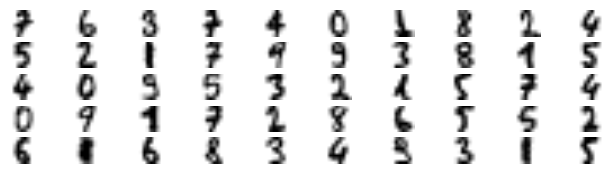

In [57]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [59]:
y_representative_digits = np.array([
    # Row 1
    7, 6, 3, 7, 4, 0, 1, 8, 2, 4,
    # Row 2
    5, 2, 1, 7, 9, 9, 3, 8, 1, 5,
    # Row 3
    4, 0, 9, 5, 3, 2, 1, 5, 7, 4,
    # Row 4
    0, 9, 1, 7, 2, 8, 6, 5, 5, 2,
    # Row 5
    6, 8, 6, 8, 3, 4, 5, 3, 1, 5
])

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test, y_test)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8977777777777778

In [61]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [62]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9

In [63]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist>cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [64]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9044444444444445

In [65]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

np.float64(0.9655172413793104)

In [66]:
from sklearn.cluster import DBSCAN

X,y = datasets.make_moons(n_samples = 1000,noise=0.05)
dbscan = DBSCAN(eps = 0.05,min_samples=5)
dbscan.fit(X)

,eps,0.05
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [67]:
dbscan.labels_

array([ 0,  1,  0,  2,  1, -1,  3,  1,  1,  3,  1,  1,  4,  4,  4,  0,  6,
        1,  5,  1,  0,  1,  1,  6,  0,  3,  3,  4,  2, -1,  3,  1,  1,  3,
       -1,  5, -1,  3,  1,  3,  0,  3,  1,  0,  1,  6,  0,  6,  0,  3,  1,
        1,  3,  0,  3,  0,  0,  0,  3,  1,  5,  0,  0,  0,  5, -1,  3,  5,
        1,  0,  4,  4,  0,  0,  4,  4,  4,  1,  6,  5,  0,  4,  3,  1,  0,
        4,  6, -1,  0,  4,  6,  1,  1,  3,  5,  1,  3,  1,  3, -1,  4,  6,
        1, -1,  0,  0,  4,  3, -1,  5,  0,  6,  3,  5,  3,  4,  0, -1,  5,
        5,  0,  4, -1,  4,  6,  1,  0,  1, -1,  4,  3,  0,  1,  0, -1,  4,
        4,  0,  1,  1, -1,  5,  6, -1,  0,  4,  0,  4,  5,  1,  4,  0,  1,
        4,  0,  0,  0,  0,  0,  1,  1,  3,  5,  1,  4,  6,  6,  1,  5,  0,
        5,  0,  6,  1,  1,  1,  0,  4,  0,  4,  4,  0,  1,  4,  5,  3,  6,
        1,  4,  0,  1, -1,  3,  2,  3,  3,  1,  2,  1,  3, -1,  1,  1,  1,
       -1,  5,  0,  2,  4,  1,  5,  1,  0, -1,  1,  5,  1, -1,  4,  1,  0,
        5,  3,  6,  1,  1

In [68]:
len(dbscan.core_sample_indices_)

787

In [69]:
dbscan.core_sample_indices_

array([  0,   1,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  31,  32,  33,
        35,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,  49,
        51,  54,  55,  56,  57,  58,  59,  62,  63,  64,  66,  67,  68,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  80,  81,  82,  83,
        84,  85,  86,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98, 100, 101, 105, 106, 107, 109, 110, 111, 113, 114, 115, 118,
       121, 124, 125, 126, 127, 129, 130, 131, 132, 133, 135, 136, 137,
       138, 139, 141, 142, 144, 146, 148, 149, 150, 152, 153, 155, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199,
       201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216,
       219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 23

In [70]:
dbscan.components_

array([[ 0.12223485,  0.23524683],
       [ 1.00826673,  0.23502666],
       [-0.69947372,  0.72482617],
       ...,
       [ 1.59991515, -0.33705885],
       [-0.00926881,  0.3357108 ],
       [ 0.74251027, -0.46707137]], shape=(787, 2))

In [71]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

,eps,0.2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [72]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

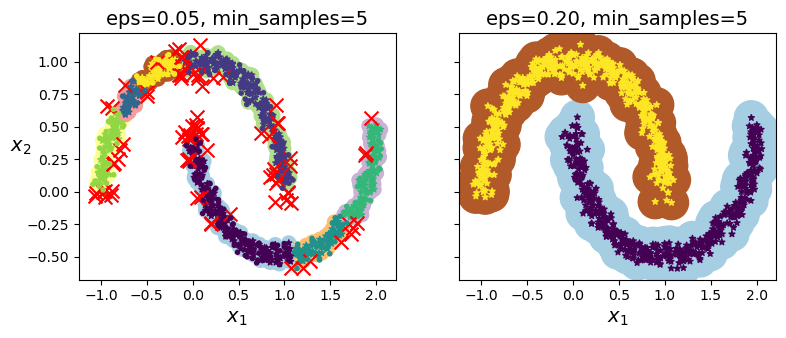

In [73]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

In [74]:
dbscan = dbscan2

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [77]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1,-0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.22, 0.78],
       [1.  , 0.  ]])

In [78]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

In [79]:
X1, y1 = datasets.make_blobs(n_samples=1000, centers=((4, -4), (0, 0)))
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = datasets.make_blobs(n_samples=250, centers=1)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [80]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


In [81]:
gm.weights_

array([0.40097944, 0.2       , 0.39902056])

In [82]:
gm.means_

array([[-1.41735034,  1.42505559],
       [11.54613251, -4.99570181],
       [ 0.05917843,  0.05681049]])

In [83]:
gm.covariances_

array([[[ 0.69402   ,  0.84001661],
        [ 0.84001661,  1.3202507 ]],

       [[ 0.99252091, -0.01673094],
        [-0.01673094,  1.1134833 ]],

       [[ 0.68592301,  0.81893953],
        [ 0.81893953,  1.29581138]]])

In [84]:
gm.converged_

True

In [85]:
gm.n_iter_

2

In [86]:
gm.predict(X)

array([0, 2, 2, ..., 1, 1, 1], shape=(1250,))

In [87]:
gm.predict_proba(X)

array([[9.99999711e-001, 2.04722770e-045, 2.89003121e-007],
       [2.00915980e-010, 1.65954168e-032, 1.00000000e+000],
       [1.12559671e-009, 2.18917044e-035, 9.99999999e-001],
       ...,
       [0.00000000e+000, 1.00000000e+000, 1.71858023e-240],
       [0.00000000e+000, 1.00000000e+000, 1.20161711e-314],
       [0.00000000e+000, 1.00000000e+000, 1.94546452e-303]],
      shape=(1250, 3))

In [88]:
X_new, y_new = gm.sample(6)

X_new

array([[-0.6769359 ,  1.86301384],
       [-2.64967445,  0.44874422],
       [-2.07687214,  1.45632891],
       [-1.21429565,  0.97826583],
       [-1.42082948, -0.64570013],
       [ 0.91463684,  1.89469749]])

In [89]:
y_new

array([0, 0, 0, 0, 2, 2])

In [90]:
gm.score_samples(X)

array([-2.06362588, -2.42496837, -2.31590972, ..., -4.78030445,
       -5.20411069, -5.1962919 ], shape=(1250,))

In [91]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [92]:
gm.bic(X)

np.float64(8328.171435658742)

In [93]:
gm.aic(X)

np.float64(8240.946155543705)

In [94]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_init=10,n_components=10)
bgm.fit(X)
np.round(bgm.weights_,2)

array([0.4, 0. , 0.4, 0. , 0. , 0.2, 0. , 0. , 0. , 0. ])

In [95]:
olivetti = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/ash/scikit_learn_data


In [98]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [99]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1,test_size=40)
train_valid_idx,test_idx = next(strat_split.split(olivetti.data,olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [101]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(199)

In [102]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


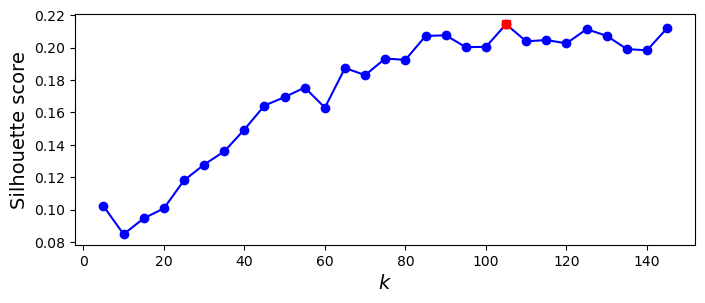

In [103]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [104]:
best_k

105

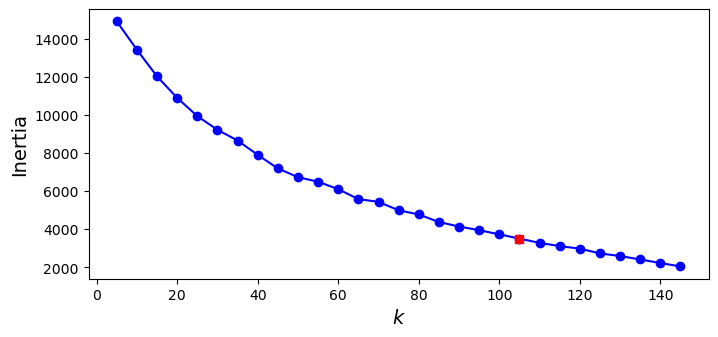

In [107]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")

In [108]:
best_model = kmeans_per_k[best_index]

Cluster 0


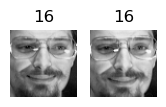

Cluster 1


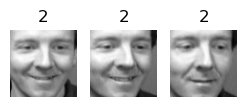

Cluster 2


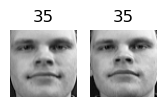

Cluster 3


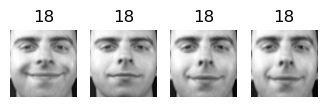

Cluster 4


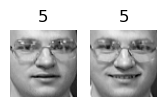

Cluster 5


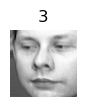

Cluster 6


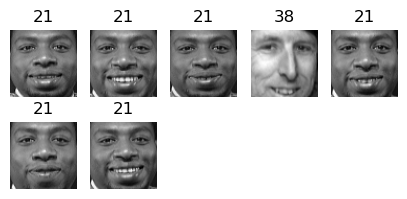

Cluster 7


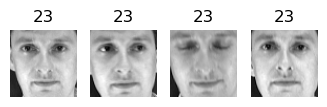

Cluster 8


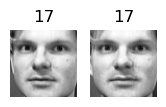

Cluster 9


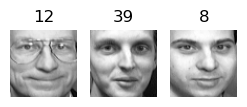

Cluster 10


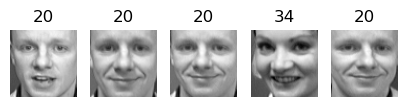

Cluster 11


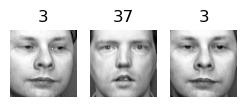

Cluster 12


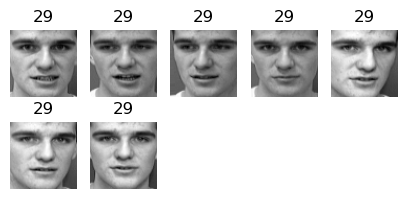

Cluster 13


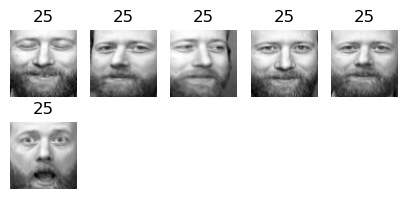

Cluster 14


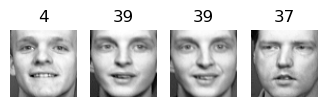

Cluster 15


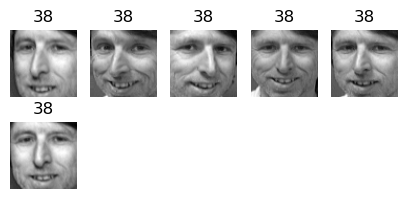

Cluster 16


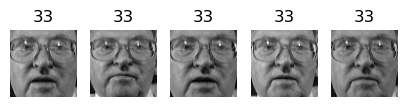

Cluster 17


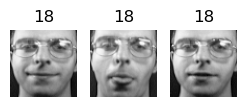

Cluster 18


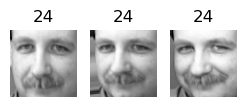

Cluster 19


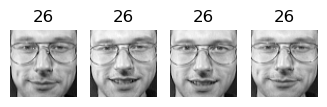

Cluster 20


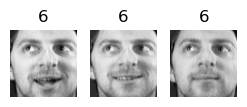

Cluster 21


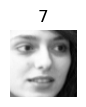

Cluster 22


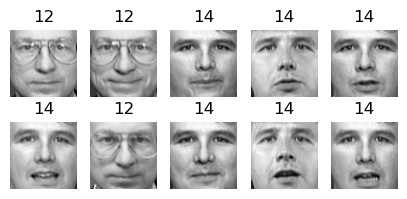

Cluster 23


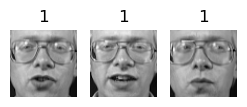

Cluster 24


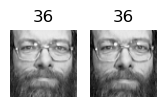

Cluster 25


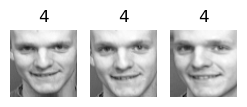

Cluster 26


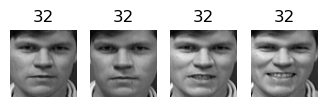

Cluster 27


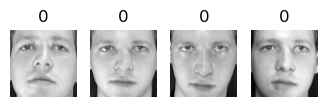

Cluster 28


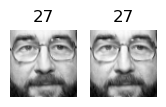

Cluster 29


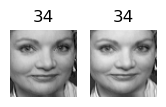

Cluster 30


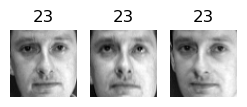

Cluster 31


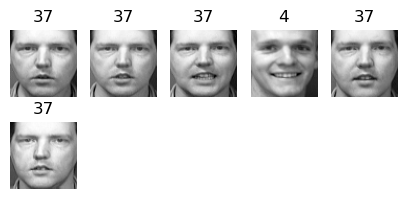

Cluster 32


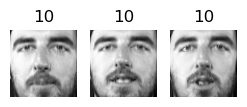

Cluster 33


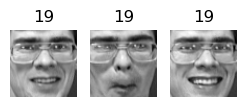

Cluster 34


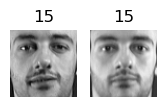

Cluster 35


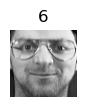

Cluster 36


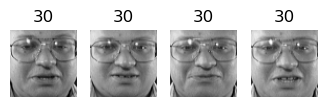

Cluster 37


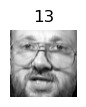

Cluster 38


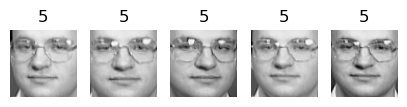

Cluster 39


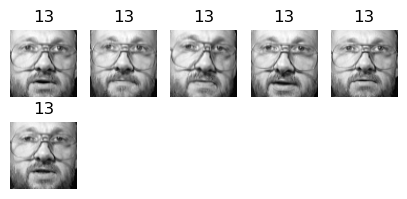

Cluster 40


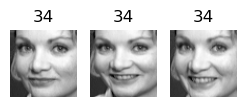

Cluster 41


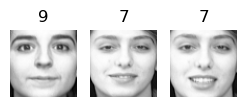

Cluster 42


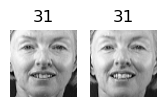

Cluster 43


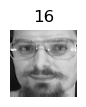

Cluster 44


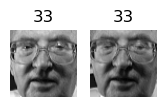

Cluster 45


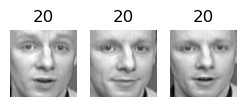

Cluster 46


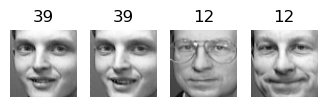

Cluster 47


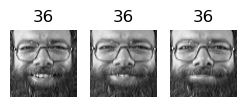

Cluster 48


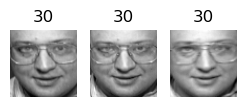

Cluster 49


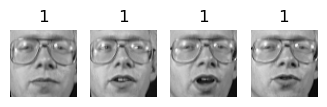

Cluster 50


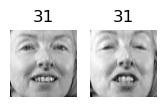

Cluster 51


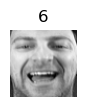

Cluster 52


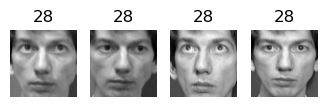

Cluster 53


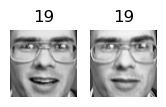

Cluster 54


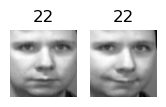

Cluster 55


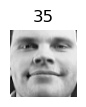

Cluster 56


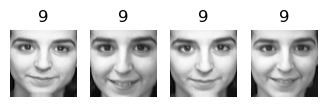

Cluster 57


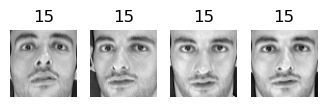

Cluster 58


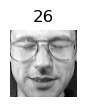

Cluster 59


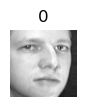

Cluster 60


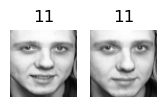

Cluster 61


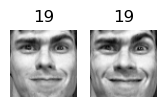

Cluster 62


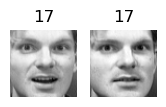

Cluster 63


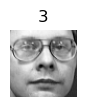

Cluster 64


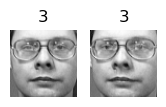

Cluster 65


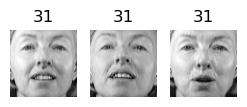

Cluster 66


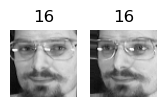

Cluster 67


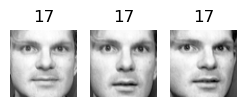

Cluster 68


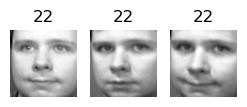

Cluster 69


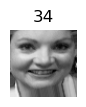

Cluster 70


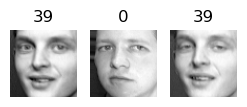

Cluster 71


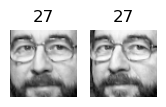

Cluster 72


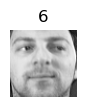

Cluster 73


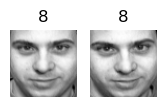

Cluster 74


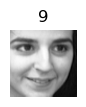

Cluster 75


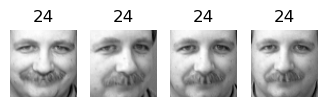

Cluster 76


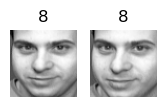

Cluster 77


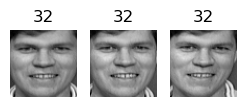

Cluster 78


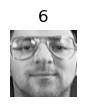

Cluster 79


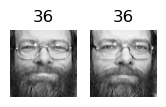

Cluster 80


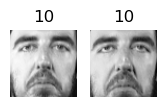

Cluster 81


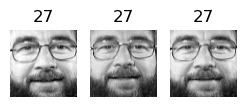

Cluster 82


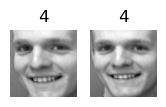

Cluster 83


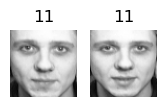

Cluster 84


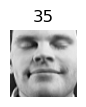

Cluster 85


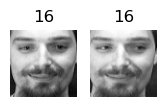

Cluster 86


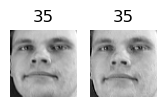

Cluster 87


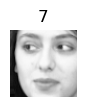

Cluster 88


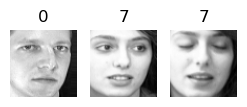

Cluster 89


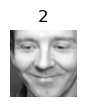

Cluster 90


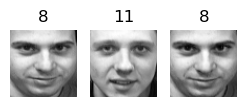

Cluster 91


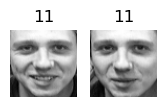

Cluster 92


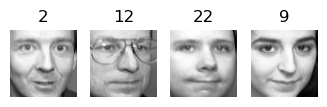

Cluster 93


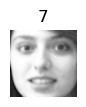

Cluster 94


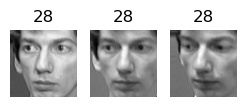

Cluster 95


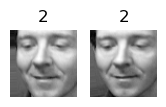

Cluster 96


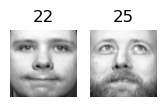

Cluster 97


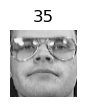

Cluster 98


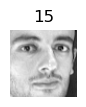

Cluster 99


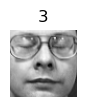

Cluster 100


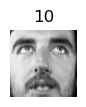

Cluster 101


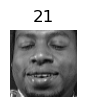

Cluster 102


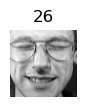

Cluster 103


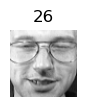

Cluster 104


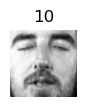

In [109]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [110]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9375

In [112]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.7625

In [113]:
for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters)),
        ("forest", RandomForestClassifier(n_estimators=150))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.425
15 0.4625
20 0.6125
25 0.6875
30 0.55
35 0.6625
40 0.6875
45 0.65
50 0.675
55 0.6875
60 0.7125
65 0.7375
70 0.725
75 0.75
80 0.675
85 0.725
90 0.7
95 0.675
100 0.7125
105 0.75
110 0.7
115 0.75
120 0.7375
125 0.7
130 0.75
135 0.7125
140 0.75
145 0.75


In [115]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [116]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.825

In [117]:
gm = GaussianMixture(n_components=40)
y_pred = gm.fit_predict(X_train_pca)

In [118]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

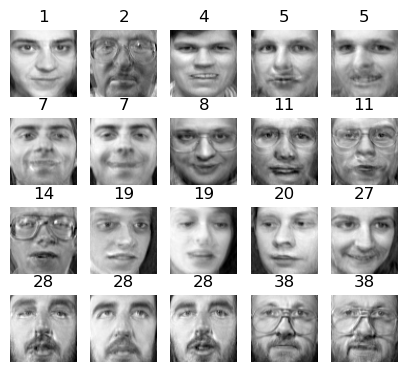

In [119]:
plot_faces(gen_faces, y_gen_faces)

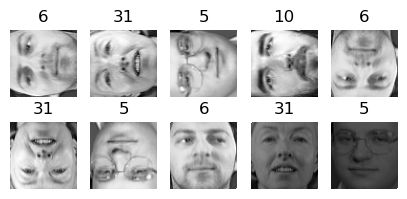

In [120]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [121]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [122]:
gm.score_samples(X_bad_faces_pca)

array([-2.5994896e+07, -2.9150168e+07, -4.2116332e+07, -3.7780384e+07,
       -4.0220028e+07, -4.4419432e+07, -2.4785330e+07, -7.5077040e+07,
       -8.4201520e+07, -6.6678228e+07], dtype=float32)

In [123]:
gm.score_samples(X_train_pca[:10])

array([1148.8663, 1139.4937, 1155.7676, 1139.8462, 1155.7676, 1077.6018,
       1124.668 , 1162.6674, 1109.2372, 1146.6355], dtype=float32)

In [124]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [125]:
reconstruction_errors(pca, X_train).mean()

np.float32(0.00019031552)

In [126]:
reconstruction_errors(pca, X_bad_faces).mean()

np.float32(0.0056909244)

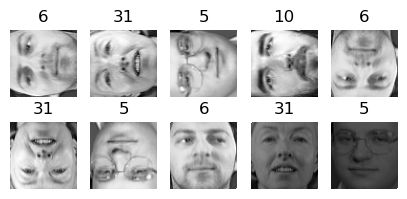

In [127]:
plot_faces(X_bad_faces, y_bad)

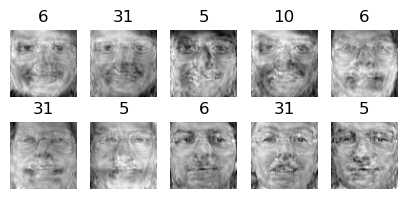

In [128]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)